<a href="https://colab.research.google.com/github/vindowsclient/StockTrends/blob/master/WK2_vinStockPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

scrip = 'AAPL'
scripsrc = 'yahoo'

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2019, 9, 8)

df = web.DataReader(scrip, scripsrc, start, end)
df.tail()



,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-30,210.449997,207.199997,210.160004,208.740005,21143400.0,208.740005
2019-09-03,206.979996,204.220001,206.429993,205.699997,20023000.0,205.699997
2019-09-04,209.479996,207.320007,208.389999,209.190002,19188100.0,209.190002
2019-09-05,213.970001,211.509995,212.000000,213.279999,23913700.0,213.279999
2019-09-06,214.419998,212.509995,214.050003,213.259995,19362300.0,213.259995


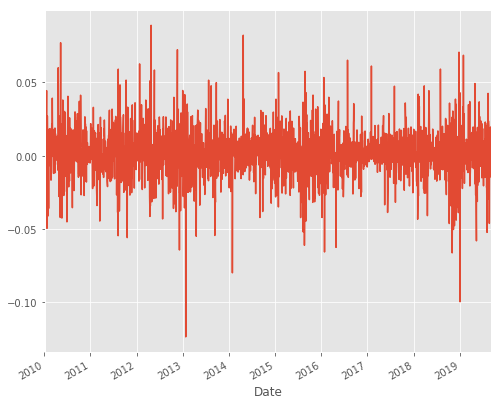

In [3]:
close_price = df['Adj Close']
mvg = close_price.rolling(window=100).mean()
#print (mvg)

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# sizing
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# what's the style
style.use('ggplot')

#moving avg. plot...

#close_price.plot(label=scrip)
#mvg.plot(label='mavg')
#plt.legend()

#return deviation check...

rets = close_price / close_price.shift(1) - 1
rets.plot(label='return')

In [4]:
#comparitive study...


df = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']
df.tail()



Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2019-08-30,208.740005,8.25,1188.099976,135.529999,137.860001
2019-09-03,205.699997,8.33,1168.390015,134.100006,136.039993
2019-09-04,209.190002,8.80,1181.410034,136.320007,137.630005
2019-09-05,213.279999,8.81,1211.380005,140.970001,140.050003
2019-09-06,213.259995,8.71,1204.930054,140.570007,139.100006


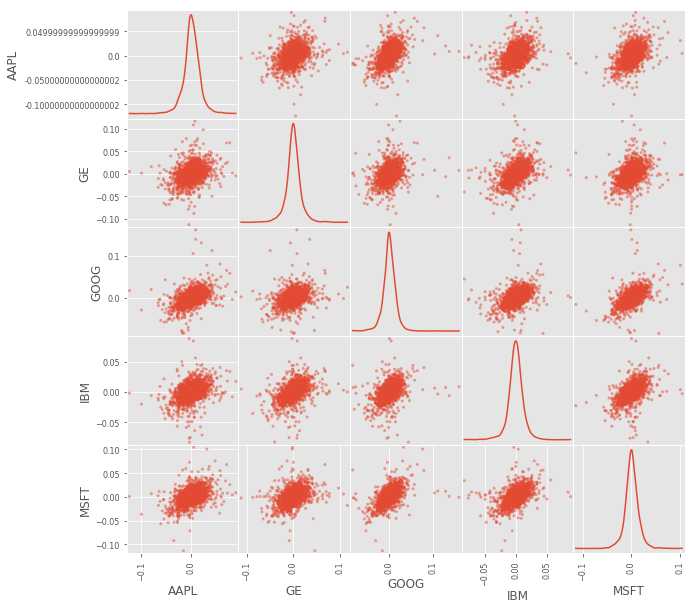

In [6]:
retscomp = df.pct_change()

corr = retscomp.corr()

#plt.scatter(retscomp.AAPL, retscomp.MSFT)
#plt.xlabel('Returns AAPL')
#plt.ylabel('Returns MSFT')

from pandas.plotting import scatter_matrix

#scatter_matrix(iris_df, alpha=0.2, figsize=(10, 10))
scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

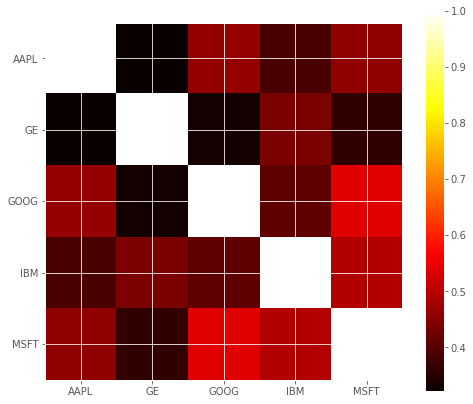

In [8]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);
